In [10]:
import pandas as pd
from utils.calculateConsumption import calculateConsumption, getConsumptionYear
from utils.plotWeekDiagram import plotWeekDiagramm, create_week_comparison
from utils.read_CSV import getData
from utils.extraploation_class import Extrapolation, Extrapolation_Consumption

# VARIABLES
consumption_development_rate = 1.045
# VARIABLES END

consumption_existing_years = calculateConsumption(consumption_development_rate)

Data für 2023 loaded succsessfully.


# Mit Lastprofilen

In [11]:
lastprofil_workday = pd.read_csv('CSV/Lastprofil/lastprofil_werktag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
lastprofil_weekend = pd.read_csv('CSV/Lastprofil/lastprofil_wochenende.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
# Speichern der Lastprofile in einem Dictionary
lastprofile_dict = {
    'workday': lastprofil_workday,
    'weekend': lastprofil_weekend
}





def calculateConsumption_lastprofile(consumption_development_rate): 
   
    directory_yearly_consumption = getData("Verbrauch")

    for year in range(2024,2031):
        prev_year_df =directory_yearly_consumption.get(year-1).copy()    #Kopie des Dataframe des letzten Jahres
        extrapolated_data = Extrapolation_Consumption(prev_year_df, year, None, None, None, consumption_development_rate, lastprofile_dict)        #Erstellung eines neuen Objekts, mit einem DataFrame
        directory_yearly_consumption[extrapolated_data.year]= extrapolated_data.df   #DataFrame in das Erzeugungsverzeichnis gespeichert wird

    
    return directory_yearly_consumption


consumption_existing_years_lastprofile = calculateConsumption_lastprofile(consumption_development_rate)

Data für 2023 loaded succsessfully.


    lastprofil
0      9673.00
1      9593.50
2      9562.00
3      9517.50
4      9433.25
..         ...
91    10284.50
92    10119.50
93     9861.25
94     9647.25
95     9464.75

[96 rows x 1 columns]
Empty DataFrame
Columns: [Datum, Gesamtverbrauch]
Index: []
Empty DataFrame
Columns: [Datum, Gesamtverbrauch]
Index: []


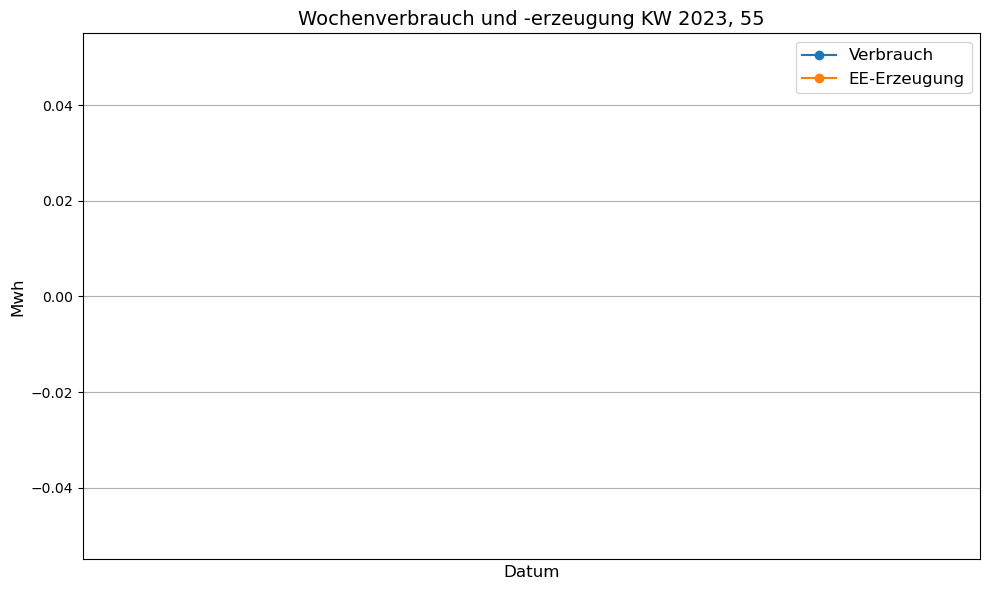

In [ ]:
selected_week = '50'
selected_year = '2023'



def get_weekly_consumption(consumption_data, selected_year, selected_week):
    # Erstelle einen DataFrame aus dem Dictionary
    yearly_consumption = pd.DataFrame.from_dict(consumption_data.get(int(selected_year)))

    # Filtere die Daten für die angegebene Woche und das Jahr
    week_filtered_data_consumption = yearly_consumption[
        (yearly_consumption['Week'] == selected_week)
    ]

    # Erstelle einen DataFrame nur mit Datum und Gesamtverbrauch
    week_consumption_df = week_filtered_data_consumption[['Datum', 'Gesamtverbrauch']]
    week_consumption_df.loc[:, 'Datum'] = pd.to_datetime(week_consumption_df['Datum'])

    return week_consumption_df





# Verwende die Funktion für consumption_existing_years
week_consumption_df = get_weekly_consumption(consumption_existing_years, selected_year, selected_week)

# Verwende die Funktion für consumption_existing_years_lastprofile
week_consumption_df_lp = get_weekly_consumption(consumption_existing_years_lastprofile, selected_year, selected_week)





print(lastprofile_dict['workday'])
print(week_consumption_df)
print(week_consumption_df_lp)


# didirectory_yearly_generation and consumption_existing_years are dicitionaries

create_week_comparison(selected_week, selected_year, week_consumption_df, week_consumption_df_lp)